In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
           'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
           'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
           'price']
data.columns = headers
data.head().T                   

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [5]:
data.info()                  #Some features have non-numeric datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

# Missing value(s) imputation and Data Munging

In [6]:
data.replace('?',np.nan,inplace = True)
data.head()                        

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

###### >>> Replace NaN by the mean
          -"normalized-losses": 41 missing data, replace them with mean
          -"bore": 4 missing data, replace them with mean
          -"stroke": 4 missing data, replace them with mean
          -"horsepower": 2 missing data, replace them with mean
          -"peak-rpm": 2 missing data, replace them with mean
##### >>> Replace by the frequency
          -"num-of-doors": 2 missing data, replace them with "four". 
          -Reason: 84% sedans is in four doors. Since four doors is most frequent, it is most likely to occur.
##### >>> Drop the whole row
          -"price": 4 missing data, simply delete the whole row
          -Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction

In [8]:
data['normalized-losses'] = data['normalized-losses'].astype('float')
data['normalized-losses'].fillna(data['normalized-losses'].mean(),inplace = True)
data['normalized-losses'].isnull().sum()

0

In [9]:
data['bore'] = data['bore'].astype('float')
data['bore'].fillna(data['bore'].mean(),inplace = True)
data['bore'].isnull().sum()        

0

In [10]:
data['stroke'] = data['stroke'].astype('float')
data['stroke'].fillna(data['stroke'].mean(),inplace = True)
data['stroke'].isnull().sum()    

0

In [11]:
data['horsepower'] = data['horsepower'].astype('float')
data['horsepower'].fillna(data['horsepower'].mean(),inplace = True)
data['horsepower'].isnull().sum()

0

In [12]:
data['peak-rpm'] = data['peak-rpm'].astype('float')
data['peak-rpm'].fillna(data['peak-rpm'].mean(),inplace = True)
data['peak-rpm'].isnull().sum()

0

In [13]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [14]:
data['num-of-doors'].value_counts().idxmax()

'four'

In [15]:
data["num-of-doors"].replace(np.nan, "four", inplace=True)
data['num-of-doors'].isnull().sum()

0

In [16]:
print('datatype of price :',data['price'].dtype )              

datatype of price : object


In [0]:
data['price'] = data['price'].astype('float')
data.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we've droped four rows
data.reset_index(drop=True, inplace=True)

In [18]:
data.isnull().sum()          

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Changing the dtype of remaining columns

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-

In [0]:
from sklearn.preprocessing import LabelEncoder
LabelEnc = LabelEncoder()
data['make']            = LabelEnc.fit_transform(data['make'])
data['body-style']      = LabelEnc.fit_transform(data['body-style'])
data['drive-wheels']    = LabelEnc.fit_transform(data['drive-wheels'])
data['engine-location'] = LabelEnc.fit_transform(data['engine-location'])
data['engine-type']     = LabelEnc.fit_transform(data['engine-type'])
data['fuel-system']     = LabelEnc.fit_transform(data['fuel-system'])

###### Indicator variable (or dummy variable)
Q.What is an indicator variable?
 An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because   the numbers themselves don't have inherent meaning.

Q. Why we use indicator variables?
  So we can use categorical variables for regression analysis.
Example
We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.

In [0]:
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
data  = pd.concat([data, dummy_variable_1], axis=1)
data.drop("fuel-type", axis = 1, inplace=True)

In [0]:
dummy_variable_2 = pd.get_dummies(data['aspiration'])
data = pd.concat([data,dummy_variable_2],axis=1)
data.drop('aspiration',axis=1,inplace=True)

In [0]:
data['num-of-doors']=data['num-of-doors'].map({'two':2,'four':4})
data['num-of-cylinders'] = data['num-of-cylinders'].map({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 28 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null int64
num-of-doors         201 non-null int64
body-style           201 non-null int64
drive-wheels         201 non-null int64
engine-location      201 non-null int64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null int64
num-of-cylinders     201 non-null int64
engine-size          201 non-null int64
fuel-system          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null i

# Pearson correlation statistics

####  Correlation coefficient                                    

😊close to +1:Large positive relationship
😊close to -1:Large negative relationship
😊close to  0:No relationship 

##### P-value
😊P-value<0.001 : Strong certainity in the result
😊P-value<0.05  : Moderate certainity in the result
😊P-value<0.1   : Weak certainity in the result    
😊P-value>0.1   : No certainity in the result

In [25]:
from scipy import stats
pearson_coef,p_value = stats.pearsonr(data['horsepower'],data['price'])
print(pearson_coef,p_value)                                 #pearson_coef value is close to +1 indicates strong relation

0.8095745670036559 6.369057428260101e-48


In [26]:
stats.pearsonr(data['engine-size'],data['price'])           

(0.8723351674455185, 9.265491622198389e-64)

In [27]:
stats.pearsonr(data['peak-rpm'],data['price'])              

(-0.10161587407588148, 0.1511769165144532)

In [28]:
stats.pearsonr(data['bore'],data['price'])

(0.5431553832626602, 8.049189483935489e-17)

In [29]:
stats.pearsonr(data['gas'],data['price'])

(-0.11032556467564852, 0.11896254438091522)

## Heat map

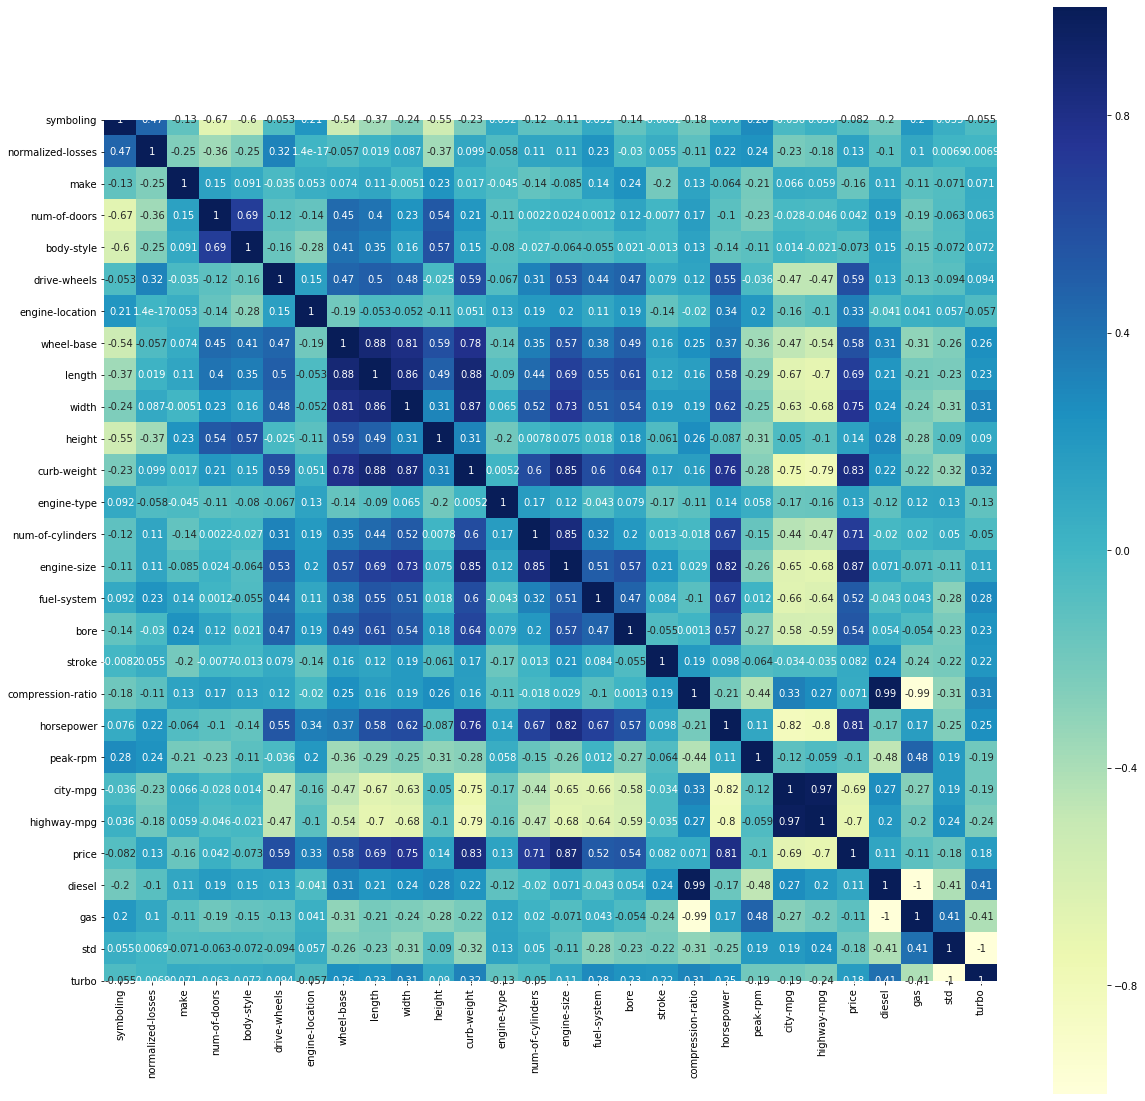

In [30]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

In [0]:
#sns.pairplot(data)

(0, 56041.77709207294)

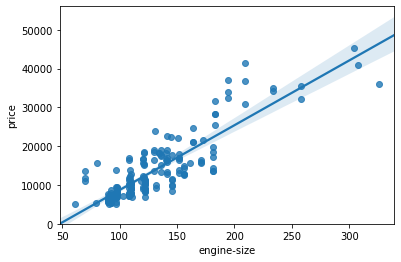

In [32]:
sns.regplot(x='engine-size',y='price',data=data)              # pearson_coeff = 0.87  p_value = <<0.001  😊
plt.ylim(0,)

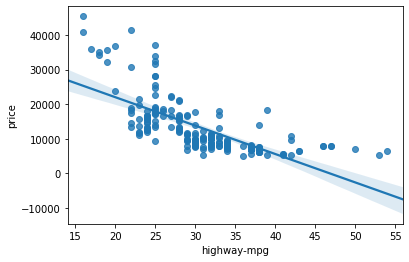

In [34]:
g = sns.regplot(x='highway-mpg',y='price',data=data)               # 'highway-mpg' can be use to predict the price of car

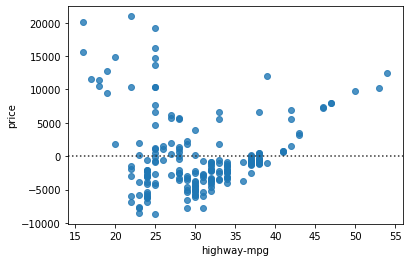

In [35]:
g = sns.residplot(data['highway-mpg'],data['price'])       #Residual plot with fitted line to deviation

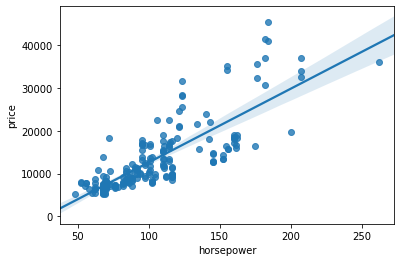

In [36]:
g=sns.regplot(x='horsepower',y='price',data=data)                # pearson_coeff = 0.81  p_value = <<0.001  😊

## Data spliting

In [0]:
from sklearn.model_selection import train_test_split
features = data.drop('price',axis=1)              
labels = data['price']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state = 10)

In [38]:
y_train

7      18920.0
26      8558.0
144     8013.0
58     10595.0
72     16503.0
        ...   
113    17950.0
64     25552.0
15     41315.0
125    37028.0
9      16430.0
Name: price, Length: 160, dtype: float64

In [0]:
y_train.columns = ['s','price']

In [0]:
y_train = pd.DataFrame(y_train)

# Car Price Prediction using different models

## 1. Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [42]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
Yhat_lr=lm.predict(x_test)
Yhat_lr[0:16]

array([[11337.66642796],
       [15714.72271628],
       [ 7208.66644196],
       [ 9462.63429531],
       [ 8589.95607161],
       [ 8148.88778844],
       [13166.89154514],
       [11147.79172289],
       [31663.1772734 ],
       [21028.30091253],
       [22082.87007667],
       [13915.57800841],
       [ 6891.40342218],
       [ 6860.29055174],
       [ 8954.99207025],
       [13765.82480022]])

In [44]:
y_test.head()

59     10245.0
5      15250.0
20      5572.0
127     9895.0
52     10945.0
Name: price, dtype: float64

In [45]:
lm.intercept_

array([-63923.51318269])

In [46]:
lm.coef_

array([[ 5.52202672e+01, -5.67129052e+00, -2.03036899e+02,
         1.45685638e+02, -4.79645066e+02,  7.32146618e+02,
         9.19798681e+03,  8.73922450e+01, -2.19358554e+01,
         5.52241377e+02,  2.39248574e+02,  2.11200315e+00,
         2.02151781e+02, -3.18041617e+02,  1.24796311e+02,
         2.05702468e+01, -2.49216005e+03, -3.42849366e+03,
         1.07273901e+03,  2.52963408e+01,  1.31359596e+00,
        -1.34645840e+02,  1.18593666e+02, -6.50450759e+03,
         6.50450759e+03, -9.25977444e+02,  9.25977444e+02]])

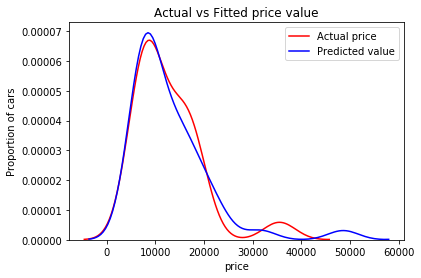

In [49]:
sns.distplot(y_test,hist=False,color='r',label='Actual price')
plt.title('Actual vs Fitted price value')
plt.ylabel('Proportion of cars')
g=sns.distplot(Yhat_lr,hist=False,color='b',label='Predicted value')

In [0]:
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_test, Yhat_lr)
#print('The mean square error of price and predicted value is: ', mse)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,Yhat_lr)

0.7625314340253339

In [62]:
print('The R-square is: ', lm.score(x_test, y_test))

The R-square is:  0.7625314340253339


## 2. Polynomial Regression - one variable
$$𝑌 = 𝑎 + 𝑏1*𝑋^1 + 𝑏2*𝑋^2 + 𝑏3*𝑋^3 ....$$

In [63]:
X = x_train['highway-mpg']
Y = y_train.price
f = np.polyfit(X,Y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.469 x + 198.2 x - 8886 x + 1.392e+05


In [0]:
p?

Text(0.5, 1.0, 'highway-mpg V/s Price(testing)')

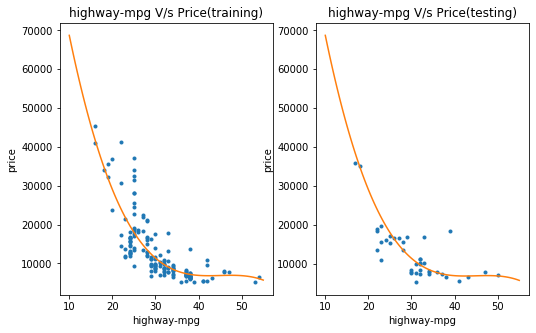

In [66]:
x_new = np.linspace(10, 55, 100)
y_new = p(x_new)
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(X,Y,'.', x_new, y_new, '-')
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.title('highway-mpg V/s Price(training)')
plt.subplot(1,3,2)
plt.plot(x_test['highway-mpg'],y_test,'.', x_new, y_new, '-')
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.title('highway-mpg V/s Price(testing)')
#ax = plt.gca()
#ax.set_facecolor((0.898, 0.898, 0.898))
#fig = plt.gcf()

In [67]:
from sklearn.metrics import mean_squared_error
print('The MSE(training) is: ',mean_squared_error(Y, p(X)))

The MSE(training) is:  21843230.604283217


In [68]:
print('The MSE(testing) is: ',mean_squared_error(y_test,p(x_test['highway-mpg'])))

The MSE(testing) is:  16177418.93646867


In [69]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y, p(X))
print('The R-square value(training) is: ', r_squared)

The R-square value(training) is:  0.6755046290683866


In [70]:
r_squared2 = r2_score(y_test, p(x_test['highway-mpg']))
print('The R-square value(testing) is: ', r_squared2)

The R-square value(testing) is:  0.640520333730318


# 3. Pipeline

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
ypipe=pipe.predict(x_test)
ypipe[0:4]

array([[ 8.48918750e+03],
       [ 3.71959258e+14],
       [-2.44411584e+13],
       [-1.35908552e+13]])